In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import CSV files into DataFrame Bandas
df1=pd.read_csv('/content/drive/MyDrive/0001Submission/Data/inDataForModels/df_TrainOutFinal.csv')
df2=pd.read_csv('/content/drive/MyDrive/0001Submission/Data/inDataForModels/df_TestOutFinal.csv')

In [4]:
df1.shape,df2.shape

((7516115, 9), (940628, 9))

In [5]:
df1.head(5)

,QuestionId,UserId,Gender,Age,GroupId,QuizId,2,3,IsCorrect
0,15911,50013,1,14.0,4975,17226,42.0,211.0,0
1,15911,59114,0,12.0,3874,17226,42.0,211.0,1
2,15911,19121,1,13.0,10399,17226,42.0,211.0,0
3,15911,112781,2,14.0,10035,17226,42.0,211.0,0
4,15911,15277,1,33.0,6005,17226,42.0,211.0,1


In [14]:
log_clf=LogisticRegression()
dt_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()
En_clf=VotingClassifier(estimators=[('lr',log_clf),('dt',dt_clf),('nb',nb_clf)],
                        voting="soft", weights=[1, 1, 5])

In [15]:


d1=df1.values
d2=df2.values
x_tr=d1[:,0:8]
y_tr=d1[:,8]
x_ts=d2[:,0:8]
y_ts=d2[:,8]


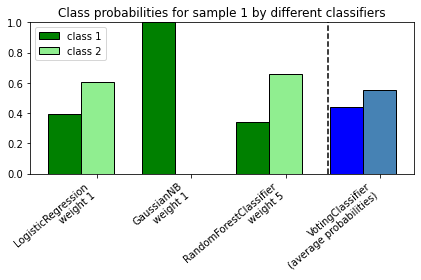

In [16]:
# predict class probabilities for all classifiers
probas = [c.fit(x_tr, y_tr).predict_proba(x_ts) for c in (log_clf, dt_clf, 
                                                          nb_clf, En_clf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green",
            edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "DecisionTreeClassifier\nweight 1",
        "GaussianNB\nweight 5",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()

In [18]:
print(class1_1)
print(class2_1)

[0.3920752386600562, 1.0, 0.34298011411741486, 0.4438536870353044]
[0.6079247613399438, 0.0, 0.6570198858825842, 0.556146312964695]
